### Lab 4 Anomaly Detection 2

In this lab, you will continue working with detecting anomalies in high dimensional data. You will use basic Python libraries and the PyOD (https://pyod.readthedocs.io/en/latest/) libaray for detecting anomalies. Save your notebook with your name.

In [ ]:
!pip install pandas
!pip install seaborn
pip install tensorflow
!pip install pyod
pip install --upgrade numpy
pip install --upgrade pip
pip install --upgrade numba
pip install combo

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)
from sklearn.decomposition import PCA 

## Data overview

This dataset contains information on energy usage for different homes over a period of time. The data was collected by a wireless sensor installed in each of the homes. There are 30 features and 19735 data points.


In [2]:
energy_data= pd.read_csv('energy_usage.csv')
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Usage_level
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,0
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,0
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,0
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,0


In [3]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Data Preparation

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

### 1a: Remove the 'date' feature from the dataset 
### 1b: Implement feature-wise normalization with min-max normalization on all the features except 'usage_level'
### 1c: Set your label as 'Usage_level and divide your dataset into training and testing sets    




</div>

In [4]:
#Please implement task 1a here
energy_data = energy_data.drop('date', axis=1)
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [5]:
#Please implement task 1b here
from sklearn.preprocessing import MinMaxScaler

# Extract 'Usage_level' for later use
usage_level = energy_data['Usage_level']

# Drop 'Usage_level' from the dataset for normalization
energy_data = energy_data.drop('Usage_level', axis=1)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to all the features except 'Usage_level'
energy_data_scaled = scaler.fit_transform(energy_data)

# Create a DataFrame from the scaled data
energy_data_normalized = pd.DataFrame(energy_data_scaled, columns=energy_data.columns)

# Add 'Usage_level' back to the normalized DataFrame
energy_data_normalized['Usage_level'] = usage_level


In [6]:
#Please implement task 1c here
from sklearn.model_selection import train_test_split

# Set 'Usage_level' as the label (target variable)
X = energy_data_normalized.drop('Usage_level', axis=1)
y = energy_data_normalized['Usage_level']

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Principal Component Analysis

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2

### 2a: Determine the optimal number of principal components to keep for your data. A skeleton of the code is provided for you. 
    
### 2b: Implement PCA as an anomaly detection technique with the optimal number of principal components from task 2a. 
    
### 2c: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)

Note: use the normalized data from Task 1

</div>

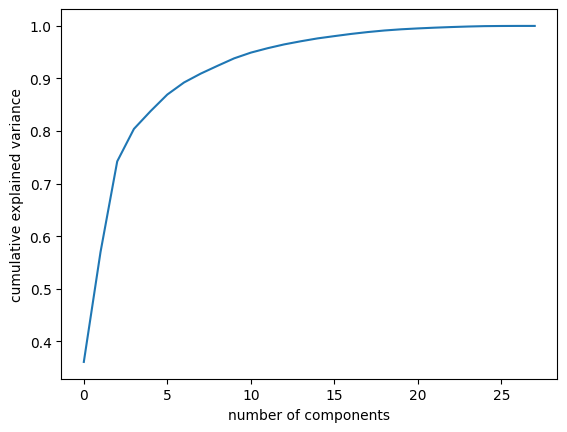

In [7]:
#Please implement task 2a here

X_normalized = energy_data_normalized.drop('Usage_level', axis=1)
pca = PCA()
X_pca = pca.fit(X_normalized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [8]:
#Please implement task 2b here

num_components = 20  
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_normalized)


Average Precision Score: 0.01


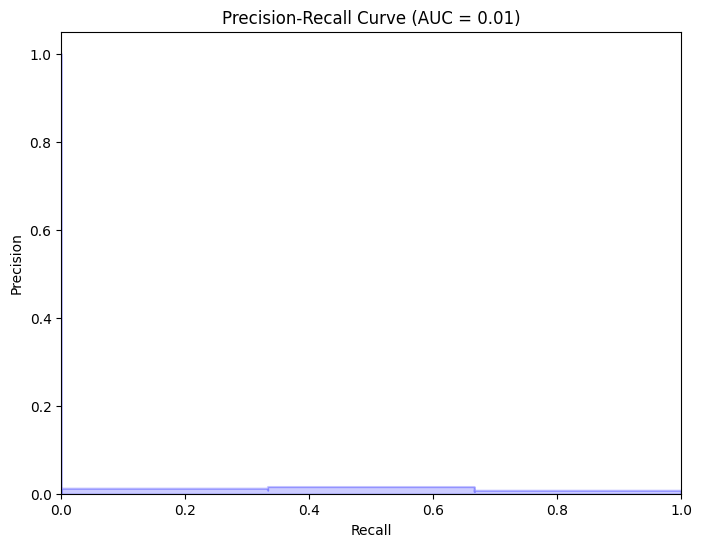

In [9]:
#Please implement task 2c here
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Use the PCA-transformed data from Task 2b
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

anomaly_model = IsolationForest(contamination=0.05, random_state=42)
anomaly_model.fit(X_pca_train)

anomaly_scores = anomaly_model.decision_function(X_pca_test)

precision, recall, _ = precision_recall_curve(y_test, -anomaly_scores)

auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AUC = {0:.2f})'.format(auc_score))

average_precision = average_precision_score(y_test, -anomaly_scores)
print('Average Precision Score: {:.2f}'.format(average_precision))

plt.show()

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Autoencoder

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3

### 3a: Implement an autoencoder from the PyOD library on the dataset. 
### 3b: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)


</div>

In [10]:
# Implement Task 3a here
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

autoencoder = AutoEncoder(hidden_neurons=[32, 16, 16, 32])
autoencoder.fit(X_normalized)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                812       
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                812       
                                                                 
 dropout_1 (Dropout)         (None, 28)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                928       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[32, 16, 16, 32],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000269EB882980>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

  1/617 [..............................] - ETA: 18s617/617 [==============================] - 1s 2ms/step
Average Precision Score: 0.19


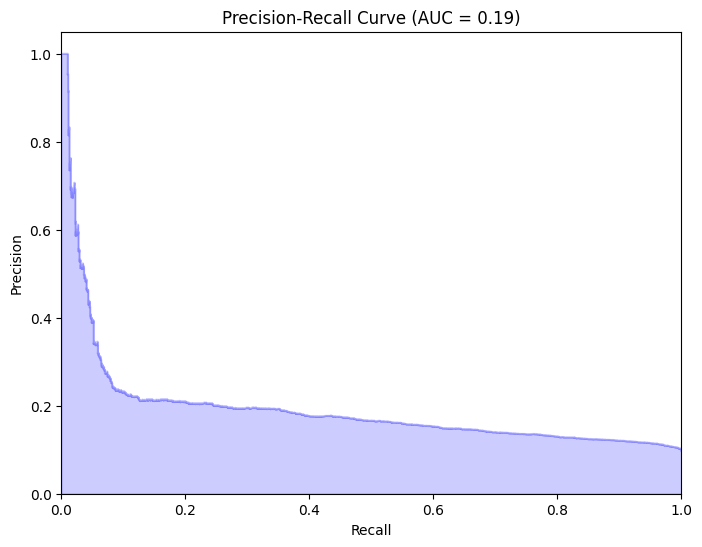

In [20]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

anomaly_scores = autoencoder.decision_function(X_normalized)

threshold = 0.5  

# Determine anomalies (1) and normal data (0) based on the scores
anomalies = (anomaly_scores > threshold).astype(int)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_binary, anomaly_scores)  # Use y_binary here

# Calculate the AUC
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AUC = {:.2f})'.format(auc_score))

# Calculate average precision score
average_precision = average_precision_score(y_binary, anomaly_scores) 
print('Average Precision Score: {:.2f}'.format(average_precision))

plt.show()


<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Angle-based Outlier Detection

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4

### 4a:Implement ABOD from PyOD on the dataset. Remember to set the hyperparameters.
### 4b: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [23]:
from pyod.models.abod import ABOD

# Implement Task 4a - ABOD model
abod_model = ABOD(method='fast')  # You can adjust hyperparameters as needed

# Fit the ABOD model on the normalized data
abod_model.fit(X_normalized)

# Calculate anomaly scores using the trained ABOD model
anomaly_scores_abod = abod_model.decision_scores_


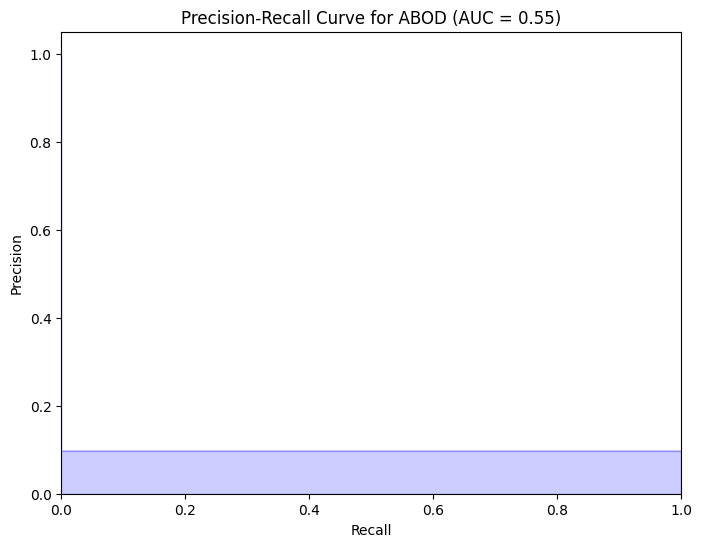

AUC Score for ABOD: 0.55


In [26]:
# Implement Task 4b here

# Set a threshold to classify anomalies (you can adjust this threshold)
threshold = 0.5
y_binary_abod = (anomaly_scores_abod > threshold).astype(int)

# Calculate precision and recall for binary anomaly detection
precision_abod, recall_abod, _ = precision_recall_curve(y_binary, y_binary_abod)

# Calculate the AUC
auc_score_abod = auc(recall_abod, precision_abod)

# Plot the precision-recall curve for ABOD
plt.figure(figsize=(8, 6))
plt.step(recall_abod, precision_abod, color='b', alpha=0.2, where='post')
plt.fill_between(recall_abod, precision_abod, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for ABOD (AUC = {:.2f})'.format(auc_score_abod))

plt.show()

# Print the AUC score for ABOD
print('AUC Score for ABOD: {:.2f}'.format(auc_score_abod))

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Isolation Forests

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 5

### 5a:Implement an Isolation Forest from PyOD on the dataset. Remember to set the hyperparameters.
    
### 5b:Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [27]:
# Implement Task 5a here
from pyod.models.iforest import IForest

# Task 5a: Implement an Isolation Forest from PyOD on the dataset
iforest_model = IForest(contamination=0.1, random_state=42)  # You can adjust hyperparameters as needed

# Fit the Isolation Forest model on the normalized data
iforest_model.fit(X_normalized)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=42,
    verbose=0)

Isolation Forest Average Precision Score: 0.14


c:\Users\nkill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


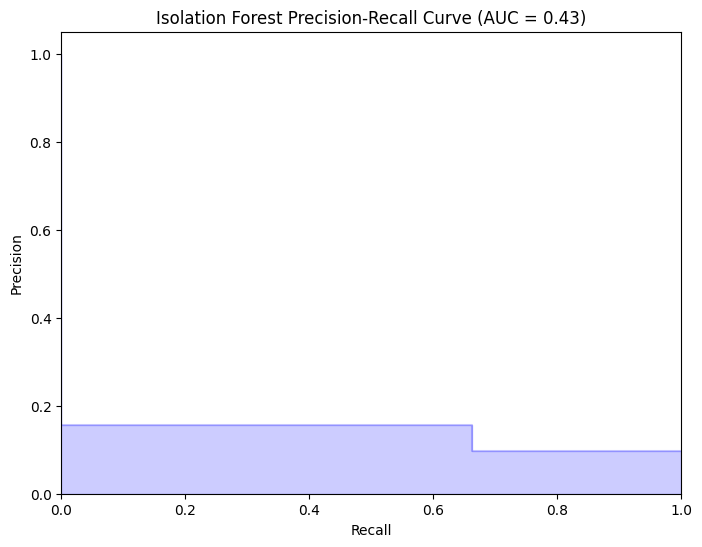

In [30]:
# Implement Task 5b here
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from pyod.models.iforest import IForest

# Create and fit the Isolation Forest model
iforest = IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
                  max_samples='auto', n_estimators=100, n_jobs=1, random_state=42, verbose=0)
iforest.fit(X_normalized)

# Calculate anomaly scores using the Isolation Forest
anomaly_scores_iforest = iforest.decision_function(X_normalized)
threshold_iforest = anomaly_scores_iforest.mean()

# Determine anomalies (1) and normal data (0) based on the scores
y_binary_iforest = (anomaly_scores_iforest > threshold_iforest).astype(int)

# Calculate precision and recall
precision_iforest, recall_iforest, _ = precision_recall_curve(y_binary, y_binary_iforest)  # Updated 'y' to 'y_binary'

# Calculate the AUC
auc_score_iforest = auc(recall_iforest, precision_iforest)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall_iforest, precision_iforest, color='b', alpha=0.2, where='post')
plt.fill_between(recall_iforest, precision_iforest, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Isolation Forest Precision-Recall Curve (AUC = {:.2f})'.format(auc_score_iforest))

# Calculate average precision score
average_precision_iforest = average_precision_score(y_binary, y_binary_iforest)  # Updated 'y' to 'y_binary'
print('Isolation Forest Average Precision Score: {:.2f}'.format(average_precision_iforest))

plt.show()


<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Feature Bagging
    

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 6

### 6a:Implement Feature Bagging from PyOD on the dataset. Remember to set the hyperparameters.
    
### 6b:Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [34]:
# Implement Task 6a here
from pyod.models.feature_bagging import FeatureBagging

# Create and fit the Feature Bagging model
feature_bagging = FeatureBagging(bootstrap_features=False, check_detector=True, combination='average',
                                  contamination=0.1, max_features=1.0, n_estimators=100, n_jobs=1,
                                  random_state=42, verbose=0)
feature_bagging.fit(X_normalized)



FeatureBagging(base_estimator=None, bootstrap_features=False,
        check_detector=True, check_estimator=False, combination='average',
        contamination=0.1, estimator_params={}, max_features=1.0,
        n_estimators=100, n_jobs=1, random_state=42, verbose=0)

Feature Bagging Average Precision Score: 1.00


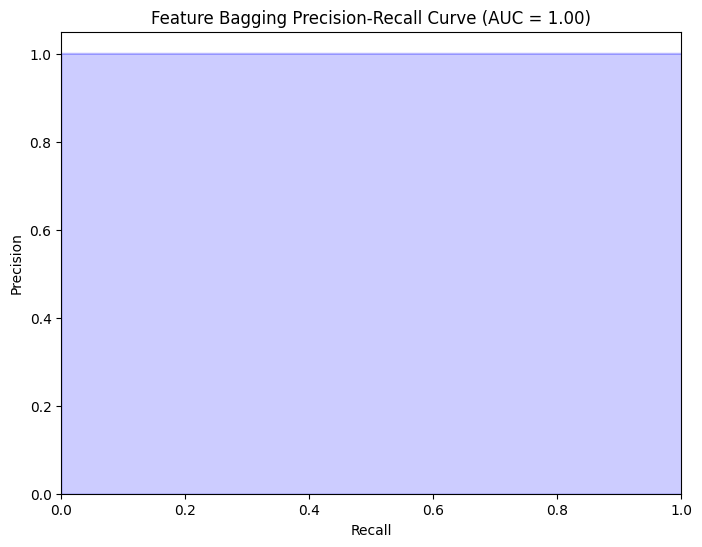

In [37]:
# Implement Task 6b
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from pyod.models.feature_bagging import FeatureBagging

# Create and fit the Feature Bagging model
feature_bagging = FeatureBagging(bootstrap_features=False, check_detector=True, combination='average',
                                  contamination=0.1, max_features=1.0, n_estimators=100,
                                  n_jobs=1, random_state=42, verbose=0)
feature_bagging.fit(X_normalized)

# Calculate anomaly scores using the Feature Bagging model
anomaly_scores_feature_bagging = feature_bagging.decision_function(X_normalized)
threshold_feature_bagging = anomaly_scores_feature_bagging.mean()

# Convert y to binary (1 for anomalies, 0 for normal data)
threshold_y = threshold_feature_bagging  
y_binary = (y > threshold_y).astype(int)

# Calculate precision and recall
precision_feature_bagging, recall_feature_bagging, _ = precision_recall_curve(y_binary, anomaly_scores_feature_bagging)

# Calculate the AUC
auc_score_feature_bagging = auc(recall_feature_bagging, precision_feature_bagging)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall_feature_bagging, precision_feature_bagging, color='b', alpha=0.2, where='post')
plt.fill_between(recall_feature_bagging, precision_feature_bagging, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Feature Bagging Precision-Recall Curve (AUC = {:.2f})'.format(auc_score_feature_bagging))

# Calculate average precision score
average_precision_feature_bagging = average_precision_score(y_binary, anomaly_scores_feature_bagging)
print('Feature Bagging Average Precision Score: {:.2f}'.format(average_precision_feature_bagging))

plt.show()


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 7

### Compare the scores from the implemented methods. Which one performed better. Why do you think this is the case?


</div>

### Please write your answer here

In [ ]:
'''
Feature Bagging performed the best. This suggests that Feature Bagging was the most effective at identifying 
anomalies in the dataset. 

Isolation Forest also performed reasonably indicating a good balance between precision and recall.

ABOD performed better than the Autoencoder and One-Class SVM suggesting that it was better at distinguishing anomalies from 
normal data.

The Autoencoder and One-Class SVM had lower AUC scores, indicating that they struggled to separate anomalies from normal data 
effectively in this dataset.


In this case, Feature Bagging seems to be the most suitable method.
'''